# DS807: Applied machine learning
Christian M. Dahl. cmd@sam.sdu.dk.

## Decision trees, ensembling, and boosting

Notes: For the purpose of this notebook, AITSL refers to An Introduction to Statistical Learning by Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani (ISBN 978-1-4614-7137-0) [chapter 8].

# Program

*Note that this lecture covers both September 17 and 22. I have decided to keep it in one set of slides, as the topics are so interdependent, and I believe it will make easier reading for you once you want to prepare for the exam or go back and look through some old material.*

After this lecture, you will:
1. Be familiar with decision trees (DTs) for classification and regression.
1. Know how to obtain information on feature importance by using DTs.
1. Be familiar with advanced uses of decision trees such as ensembling, in the form random forests (RFs), and boosting, in the form of gradient boosted trees.
1. Have applied your knowledge in order to train DTs, RFs, and boosting algorithms for classification and regression.

# Decision trees for classification

Decision trees for classification works by asking "questions" about the features in such a way that they seperate the two classes *as well as possible*.

For example, if we have data on people's height and we want to predict their gender, it is a good strategy to ask whether an individual is over a certain height (and in this case predict the individual is a male).

But exactly which height do we ask about? The one that performs best at separating the sexes, which we estimate based on the training data.

# Asking multiple questions

The "magic" of a decision tree is that it asks multiple questions.

Assume we also have data on people's weight. After separating the sexes by their height, it may then improve the separation by asking asking whether an individual is above a certain weight.

However, and this is crucial, it may also inquire about the height ***again***.

It asks about the feature that allows for best separation. Hence, it may start by asking about height, then weight, then height again, and so forth.

# A decision tree

<img src="./graphics/decision-tree.png" alt="Drawing" style="width: 400px;"/>
Source: "AITSL"

# ... and its corrosponding decision partitions

<img src="./graphics/decision-tree-partitioning.png" alt="Drawing" style="width: 400px;"/>
Source: "AITSL"

# Square and non-square decision boundaries

<img src="./graphics/linear-non-linear-decision-boundaries.png" alt="Drawing" style="width: 400px;"/>
Source: "AITSL"

# Coding a DT for classification

This first example illustrates how we can solve the "circle" problem (as in the last lecture).

To fit a DT, we start by initializing a DT for classification, using $\texttt{model = tree.DecisionTreeClassifier(settings)}$.

We then fit it on our data, using $\texttt{model.fit(Xtrain, ytrain)}$.

We can then predict on data using $\texttt{yhat = model.predict(Xtest)}$.

Note how only initialization is different from an SVM!

Link to model and settings: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

(8000, 2) (2000, 2) (8000,) (2000,)


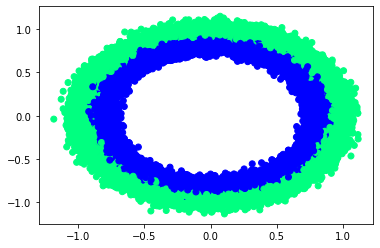

In [1]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from matplotlib import pyplot as plt

# We start with "circle" data, as we saw in the example earlier.
X, y = make_circles(n_samples=10000, noise=0.05, random_state=42)

# We use `train_test_split` to split our data into a train and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Let us look at the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.get_cmap("winter_r"))
plt.show()

DT achieved 73.2% accuracy (SVM last week ~94%).


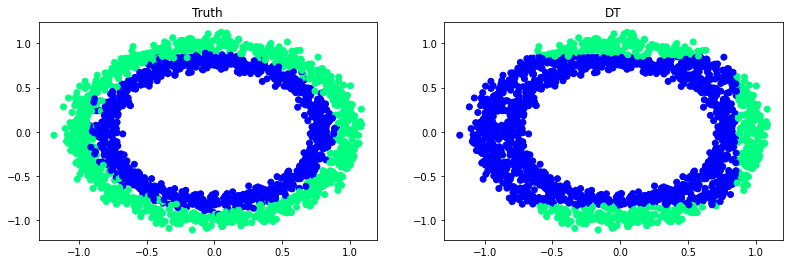

In [2]:
decision_tree = tree.DecisionTreeClassifier(max_depth=3)
decision_tree.fit(X_train, y_train)

y_test_hat = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test_hat, y_test)
print(f'DT achieved {round(accuracy * 100, 1)}% accuracy (SVM last week ~94%).')

fig = plt.figure(figsize=plt.figaspect(0.3))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.get_cmap("winter_r"))
plt.title('Truth')

ax = fig.add_subplot(1, 2, 2)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test_hat, cmap=plt.get_cmap("winter_r"))
plt.title('DT')

plt.show()

# But how?

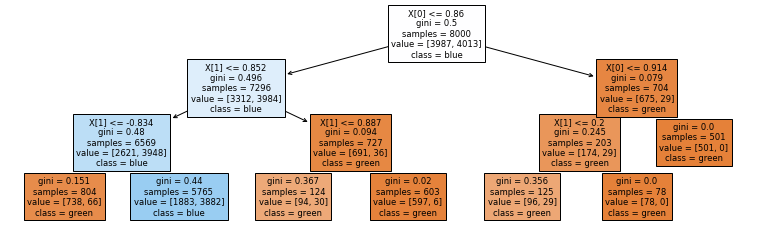

In [3]:
fig = plt.figure(figsize=plt.figaspect(0.3))
ax = fig.add_subplot(1, 1, 1)
tree.plot_tree(decision_tree, filled = True,class_names=["green","blue"])
plt.show()

<img src="./graphics/GiniEntropy.PNG" alt="Drawing" style="width: 800px;"/>
Source: "AITSL"

In [4]:
decision_tree_deep = tree.DecisionTreeClassifier() # no longer restricting depth
decision_tree_deep.fit(X_train, y_train)

# ... and predicting
y_test_hat_deep = decision_tree_deep.predict(X_test)
accuracy_deep = accuracy_score(y_test_hat_deep, y_test)
print(f'Deep DT achieved {round(accuracy_deep * 100, 1)}% accuracy (SVM last week ~94%).')

print(f'Depth: {decision_tree_deep.get_depth()}')

Deep DT achieved 95.6% accuracy (SVM last week ~94%).
Depth: 17


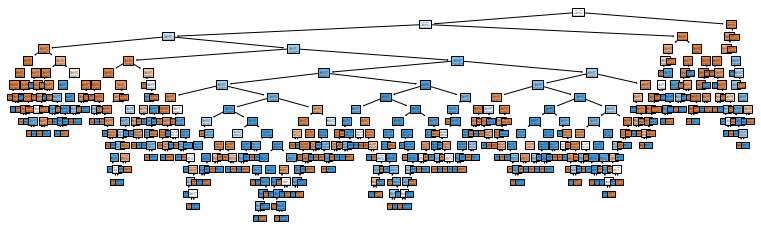

In [5]:
fig = plt.figure(figsize=plt.figaspect(0.2))
ax = fig.add_subplot(1, 1, 1)
tree.plot_tree(decision_tree_deep, filled = True,class_names=["green","blue"])
plt.show()

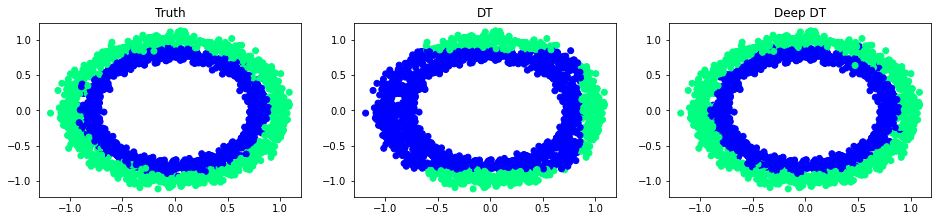

In [6]:
fig = plt.figure(figsize=plt.figaspect(0.2))
ax = fig.add_subplot(1, 3, 1)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.get_cmap("winter_r"))
plt.title('Truth')

ax = fig.add_subplot(1, 3, 2)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test_hat, cmap=plt.get_cmap("winter_r"))
plt.title('DT')

ax = fig.add_subplot(1, 3, 3)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test_hat_deep, cmap=plt.get_cmap("winter_r"))
plt.title('Deep DT')

plt.show()

# Decision trees are ***greedy*** and prone to overfitting

Are the questions always optimal? **Absolutely not.** Constructing an optimal decision tree is NP-complete.

But I said (and I quote) "It asks about the feature that allows for best separation". Is this not a contradiction?

**No**. Decision trees are ***greedy***, meaning that each split maximizes the performance without taking into consideration potential further splits. A ***greedy*** algorithm is one that maximizes immediate reward without consideration for final reward.

This is also why, despite the many "layers" of questions, these are not considered part of deep learning (a point also made by François Chollet).

Further, unrestricted decision trees split the data until they perfectly separate the data. This can potentially lead to high variance and poor generalization (overfitting).

# Training, validation, and test performance

<img src="./graphics/train-val-cv-loss.png" alt="Drawing" style="width: 600px;"/>
Source: "AITSL"

In [7]:
decision_tree_restricted = tree.DecisionTreeClassifier(
    min_samples_leaf=10,
    )

decision_tree_restricted.fit(X_train, y_train)

# ... and predicting
y_test_hat_restricted = decision_tree_restricted.predict(X_test)
accuracy_restricted = accuracy_score(y_test_hat_restricted, y_test)
print(f'Restricted DT achieved {round(accuracy_restricted * 100, 1)}% accuracy (SVM last week ~94%).')

print(f'Depth: {decision_tree_restricted.get_depth()}')

Restricted DT achieved 96.4% accuracy (SVM last week ~94%).
Depth: 16


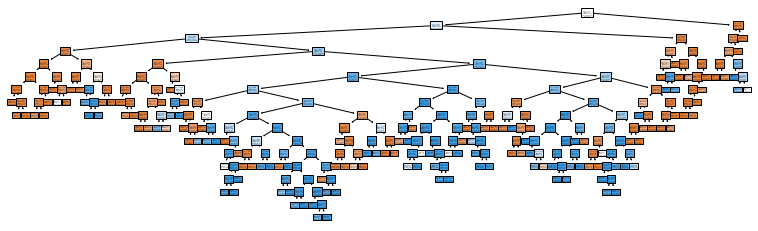

In [8]:
fig = plt.figure(figsize=plt.figaspect(0.2))
ax = fig.add_subplot(1, 1, 1)
tree.plot_tree(decision_tree_restricted, filled = True,class_names=["green","blue"])
plt.show()

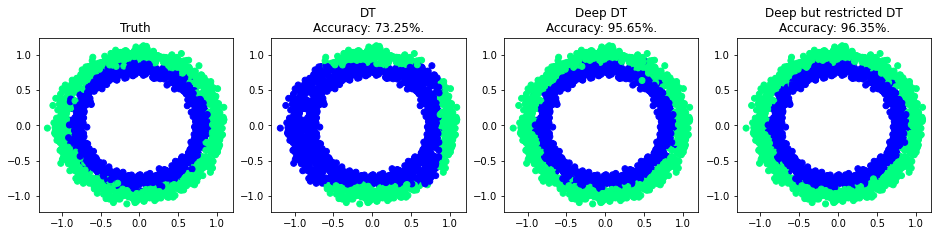

In [9]:
fig = plt.figure(figsize=plt.figaspect(0.2))
ax = fig.add_subplot(1, 4, 1)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.get_cmap("winter_r"))
plt.title('Truth')

ax = fig.add_subplot(1, 4, 2)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test_hat, cmap=plt.get_cmap("winter_r"))
plt.title(f'DT\nAccuracy: {round(accuracy * 100, 2)}%.')

ax = fig.add_subplot(1, 4, 3)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test_hat_deep, cmap=plt.get_cmap("winter_r"))
plt.title(f'Deep DT\nAccuracy: {round(accuracy_deep * 100, 2)}%.')

ax = fig.add_subplot(1, 4, 4)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test_hat_restricted, cmap=plt.get_cmap("winter_r"))
plt.title(f'Deep but restricted DT\nAccuracy: {round(accuracy_restricted * 100, 2)}%.')

plt.show()

# Important settings for DTs

Without tuning, a DT considers all features for each split and is "fully grown", i.e. until all leaves are "pure". Often, changing these settings is helpful.

Some of the most important parameters are:

1. **max_depth**: The maximum depth we allow the tree (i.e. maximum number of questions to ask after each other).
1. **min_samples_split**: The minimum number of samples left in a node to allow a split.
1. **min_samples_leaf**: The minimum number of samples to allow in a leaf.
1. **max_features**: The maximum number of features to consider when splitting (i.e. maybe select half the features by random and select the best question when restricting the features to consider to these).

For a full list see https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.

**Note**: Often, one only needs to consider 1-2 of the first 3 parameters (as they each restrict growth, and considering 1-2 of them is "enough"). So my recommendation is to consider perhaps 1-2 of the first 3 and also consider the the last.

# Avoiding overfitting by growing big trees and pruning them back
<img src="./graphics/MinCostComplexPruning.PNG" alt="Drawing" style="width: 800px;"/>

# Exercise

Let's try to use DTs to diagnose (breast) cancer patients. Further, let us investigate how various settings impact the performance.

1. Use the $\texttt{load_breast_cancer}$ data (remember to split your data into a train and a test set). Try to implement a decision tree classifer (with default settings). How well does it perform (i.e. what is its accuracy in diagnosing whether patients have cancer)? 
1. Try different values for **max_depth** (must be integers), **min_samples_split** (must be integers OR a fraction), **min_samples_leaf** (must be integers OR a fraction), and **max_features** (can be an integer, a fraction, or one of "auto", "log2").

**Hint**: You may use the notebook I have uploaded under this lecture as a starting point ($\texttt{exercise-dt-2-classes.ipynb}$). It provides some of the code, and you then have to fill in the rest. You do not have to use it - it is there if you think it might be helpful!

# More than 2 classes

In many classification problems, we have more than 2 classes. This is completely straight-forward for DTs to handle - no changes are needed.

In each leaf node, it predicts the most common class in the training data (just as it did with 2 classes).

Let's take a look using the wine dataset.

In [10]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from matplotlib import pyplot as plt
import numpy as np

# Load the wine dataset
X, y = load_wine(return_X_y=True)
print("classes:", np.unique(y))

# We use `train_test_split` to split our data into a train and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

classes: [0 1 2]
(142, 13) (36, 13) (142,) (36,)


In [11]:
# Initialize a DT
dt = tree.DecisionTreeClassifier()

# Fit your DT
dt.fit(X_train, y_train)

# Predict on your test data with your DT
y_test_hat = dt.predict(X_test)

# Obtain accuracy by using the `accuracy_score` function
accuracy = accuracy_score(y_test_hat, y_test)

# Print results
print(f'DT achieved {round(accuracy * 100, 1)}% accuracy.')

DT achieved 94.4% accuracy.


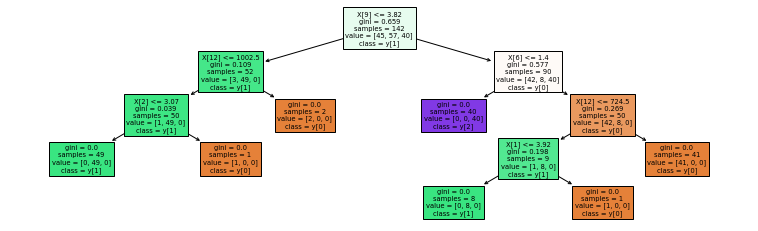

In [12]:
fig = plt.figure(figsize=plt.figaspect(0.3))
ax = fig.add_subplot(1, 1, 1)
tree.plot_tree(dt, filled = True,class_names=True)
plt.show()

# Exercise

Let's try to optimize the performance of a DT on on the wine data (classification of wines).

1. Use the $\texttt{load_wine}$ data (remember to split your data into a train, validation, and test data). Find the optimal parameters (using the parameters discussed earlier). How high accuracy can you achieve on the test data?

**Hint**: You may use the notebook I have uploaded under this lecture as a starting point ($\texttt{exercise-dt-k-classes.ipynb}$). It provides some of the code, and you then have to fill in the rest. You do not have to use it - it is there if you think it might be helpful!

# Feature importance

One of the great things about DTs (and also random forests and tree bosting, since they rely on DTs) is the possibility to gauge at the importance of the respective features.

How? Well, why not look at how many times a certain feature was used to perform a split as well as how much the question helps in separating the classes?

This helps us select the important features (and omitting those that only introduce noise).

Let's look at it for the breast cancer case.

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from matplotlib import pyplot as plt

# Use the `load_breast_cancer` function to construct your dataset
X, y = load_breast_cancer(return_X_y=True)

# Use `train_test_split` to split your data into a train and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [14]:
# Initialize a DT
dt = tree.DecisionTreeClassifier()

# Fit your DT
dt.fit(X_train, y_train)

# Predict on your test data with your DT
y_test_hat = dt.predict(X_test)

# Obtain accuracy by using the `accuracy_score` function
accuracy = accuracy_score(y_test_hat, y_test)

# Print results
print(f'DT with default settings achieved {round(accuracy * 100, 1)}% accuracy.')

DT with default settings achieved 93.9% accuracy.


In [15]:
import pandas as pd

importances = dt.feature_importances_
names = load_breast_cancer()['feature_names']

feature_importance = pd.DataFrame(zip(names, importances), columns=['Feature', 'Importance'])
feature_importance = feature_importance.sort_values('Importance', ascending=False).reset_index()
feature_importance[:10]

,index,Feature,Importance
0,7,mean concave points,0.691420
1,27,worst concave points,0.065651
2,20,worst radius,0.052299
3,22,worst perimeter,0.051494
4,21,worst texture,0.037046
5,1,mean texture,0.030808
6,16,concavity error,0.018554
7,17,concave points error,0.015931
8,13,area error,0.011983
9,14,smoothness error,0.009306


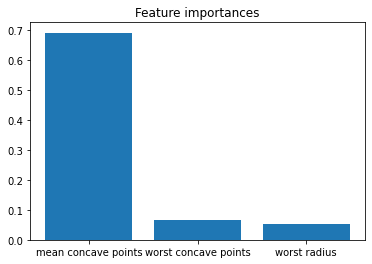

In [16]:
from matplotlib import pyplot as plt

plt.figure()
plt.title("Feature importances")
plt.bar(feature_importance['Feature'][:3], feature_importance['Importance'][:3])
plt.show()

In [17]:
# Tree based on most important features only
top_features = (-importances).argsort()[:15]
print(top_features)

Z_train = X_train[:, top_features]
Z_test = X_test[:, top_features]

# Initialize a DT
dt = tree.DecisionTreeClassifier()

# Fit your DT
dt.fit(Z_train, y_train)

# Predict on your test data with your DT
y_test_hat = dt.predict(Z_test)

# Obtain accuracy by using the `accuracy_score` function
accuracy = accuracy_score(y_test_hat, y_test)

# Print results
print(f'DT with only top features achieved {round(accuracy * 100, 1)}% accuracy.')

[ 7 27 20 22 21  1 16 17 13 14 24 25 26 23 19]
DT with only top features achieved 93.9% accuracy.


# Exercise

Let's try to find the most important features for predicting wines.

1. Use the $\texttt{load_wine}$ data (remember to split your data into a train and test data). Go through the steps in the previous slides to find the most important features.

**Hint**: You may use the notebook I have uploaded under this lecture as a starting point ($\texttt{exercise-dt-feature-importance.ipynb}$). It provides some of the code, and you then have to fill in the rest. You do not have to use it - it is there if you think it might be helpful!

# Regression

DTs can be extended to regression. But how? What does the leaf nodes "guess"? Simply the "best" value for the given group/partition. Below is the "batters" example from the reading for today.

<img src="./graphics/simple-decision-tree.png" alt="Drawing" style="width: 400px;"/>
Source: "AITSL"

<img src="./graphics/decision-tree-perspective-plot.png" alt="Drawing" style="width: 400px;"/>
Source: "AITSL"

# Coding a DT for regression

This first example illustrates how we can tackle the Boston housing data (as in the last lecture) using a DT.

To fit a DT, we start by initializing a DT for regression, using $\texttt{model = tree.DecisionTreeRegressor(settings)}$.

We then fit it on our data, using $\texttt{model.fit(Xtrain, ytrain)}$.

We can then predict on data using $\texttt{yhat = model.predict(Xtest)}$.

Remember how with SVMs, we wrote $\texttt{model = svm.SVC}$ for classification and $\texttt{model = svm.SVR}$ for regression (changed C to R). For DTs, we write $\texttt{model = tree.DecisionTreeClassifier(settings)}$ for classification and $\texttt{model = tree.DecisionTreeRegressor(settings)}$ for regression (changing Classifier to Regressor).

That is, there is hardly any difference!

In [18]:
from sklearn.datasets import load_boston # NOTE how we use the Boston data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error # NOTE how we use a new metric!
from sklearn import tree # tree instead of svm!

X, y = load_boston(return_X_y=True)

# We use `train_test_split` to split our data into a train and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [19]:
# Initialize
dt = tree.DecisionTreeRegressor()

# Fit
dt.fit(X_train, y_train)

# Predict
y_test_hat = dt.predict(X_test)
mse = mean_squared_error(y_test_hat, y_test)
print(f'''DT with default settings achieved {round(mse, 3)} MSE (will be in ~9-25 range).
The default SVM achieved MSE of ~52.
Even with scaling the SVM did not get further than ~25.
So this score is quite impressive compared to last time!.''')

print(f'\nDepth: {dt.get_depth()}')

DT with default settings achieved 10.849 MSE (will be in ~9-25 range).
The default SVM achieved MSE of ~52.
Even with scaling the SVM did not get further than ~25.
So this score is quite impressive compared to last time!.

Depth: 19


# Exercise

1. Use the $\texttt{load_boston}$ data (remember to split your data into a train and test data). Using your training and validation data, optimize the parameters of your DT. How well does your optimized model perform on the test data? Is it better than your optimized SVM for the same data (the third exercise from last week)?
1. (Optional/bonus): Try to perform standardization to your data. Does it improve your model? Further, try to select only the 5 most important features. Does it improve the performance of your model?

**Hint**: You may use the notebook I have uploaded under this lecture as a starting point ($\texttt{exercise-dt-regression.ipynb}$). It provides some of the code, and you then have to fill in the rest. You do not have to use it - it is there if you think it might be helpful!

# Some remarks on where to go next

The earlier examples and exercises share a somewhat peculiar feature:

1. DTs tend to just work pretty well, even with default settings and with no standardization to data. On the specific examples nearly as good or in some cases better than SVMs (but there are many cases where SVMs are far better!).
1. And ***extremely importantly***, the performance varied **a lot** between runs, even with the same data and settings.

The first point is one of the great stengths about DTs. The second point is a big weakness, but something we can handle.

Enter **ensembling**. One of **the** most important techniques for a data scientist.

Ensembling is simply combining multiple models (does not have to be DTs). For example, you may:

1. Take an average of the predictions of multiple models.
1. Train a second model on the errors of your first model.

Both may potentially improve performance **a lot**.

In [20]:
from sklearn.datasets import load_boston # NOTE how we use the Boston data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error # NOTE how we use a new metric!
from sklearn import tree # tree instead of svm!

X, y = load_boston(return_X_y=True)

# We use `train_test_split` to split our data into a train and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [21]:
import numpy as np
y_test_hat = np.zeros(y_test.shape)

nb_trees = 100

for i in range(nb_trees):
    dt = tree.DecisionTreeRegressor()
    dt.fit(X_train, y_train)
    y_test_hat += dt.predict(X_test)

y_test_hat /= nb_trees
    
mse = mean_squared_error(y_test_hat, y_test)
print(f'''Forest of DTs with default settings achieved {round(mse, 3)} MSE (will be in ~10-12 range).
Although not strictly better, this is much more consistently good than the lone tree!
And much better on average!''')

Forest of DTs with default settings achieved 10.019 MSE (will be in ~10-12 range).
Although not strictly better, this is much more consistently good than the lone tree!
And much better on average!


In [22]:
# Initialize
dt1 = tree.DecisionTreeRegressor(max_depth=5)
dt2 = tree.DecisionTreeRegressor(max_depth=5)

# Fit first tree and predict on TRAINING data
dt1.fit(X_train, y_train)
y_train_hat = dt1.predict(X_train)

# Fit second tree on errors of first tree on training data
errors_train_1 = y_train - y_train_hat
dt2.fit(X_train, errors_train_1)

# Predict by first model
y_test_hat = dt1.predict(X_test)
# Adjust by second model
y_test_hat += dt2.predict(X_test)

mse = mean_squared_error(y_test_hat, y_test)
print(f'''Boosted DTs with default settings achieved {round(mse, 3)} MSE (will be in ~6-20 range).
Although not strictly better, this is much more consistently good than the lone tree!
And much better on average!''')

Boosted DTs with default settings achieved 19.115 MSE (will be in ~6-20 range).
Although not strictly better, this is much more consistently good than the lone tree!
And much better on average!


# But the above code is messy...

... yes. That is why you are never going to do it that way in practice. It was just a demonstration of what goes on behind the scenes!

We are going to use pre-built implementations. Specifically Random Forest (RF) and gradient boosting implementations from $\texttt{sklearn}$.

# Random forests

The first example of ensembling I showed - simply taking averages of multiple trees - is largely what a random forest is (although a few additional tricks are used as well).

When used for classification, the trees "vote" when predicting. Use $\texttt{RandomForestClassifier}$.

When used for regression, the mean of the individual trees' predictions are used. Use $\texttt{RandomForestRegressor}$

The parameters of the random forest are almost like those of a decision tree (after all, it is just multiple decision trees). The main new things are:

1. **n_estimators**: The number of trees in the forest. An integer. Any sufficiently large value is good.
1. **bootstrap** and **max_samples**: A bit more tricky. The first is whether, instead of using all data to build each tree, to instead use bootstrapping to sample observations (so True/False). The second is the number of samples to draw using the bootstrap for each tree. In general bootstrapping should be used, as it introduces variations between the trees, which is helpful (so they are not identical, in which case they wouldn't be better than one!).

<img src="./graphics/bagging-rf-performance.png" alt="Drawing" style="width: 600px;"/>
Source: "AITSL"

# Random forests in action

RFs are almost magical in their ability to just work and perform quite well. So let's look at two examples:

1. RFs for predicting breast cancer (i.e. using the $\texttt{load_breast_cancer}$ data).
1. RFs for predicting housing prices (i.e. using the $\texttt{load_boston}$ data).

In both cases, the performance (as you will see) is quite impressive, beating out our earlier solutions - despite the fact that we won't do any tuning and just use the default settings for now. Further, they are much more "stable" (does not vary much between runs).

In [23]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import ensemble # ensemble instead of tree

# Use the `load_breast_cancer` function to construct your dataset
X, y = load_breast_cancer(return_X_y=True)

# Use `train_test_split` to split your data into a train and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [24]:
# Initialize
rf = ensemble.RandomForestClassifier()

# Fit
rf.fit(X_train, y_train)

# Predict
y_test_hat = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_test_hat)
print(f'''RF with default settings achieved {round(accuracy * 100, 1)}% accuracy.''')

RF with default settings achieved 96.5% accuracy.


In [25]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import ensemble # ensemble instead of tree

# Use the `load_boston` function to construct your dataset
X, y = load_boston(return_X_y=True)

# We use `train_test_split` to split our data into a train and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [26]:
# Initialize
rf = ensemble.RandomForestRegressor()

# Fit
rf.fit(X_train, y_train)

# Predict
y_test_hat = rf.predict(X_test)
mse = mean_squared_error(y_test, y_test_hat)
print(f'''RF with default settings achieved {round(mse, 3)} MSE.''')

RF with default settings achieved 9.209 MSE.


# Why random forests work

How come a forest of DTs is so much better than a single DT?

The key thing is to make sure that the trees are *different from each other*.

Since they are not all the same, they complement each other. In practice: a trade-off of reducing variance A LOT by increasing bias a little.

For this reason, boostrapping and limiting the maximum number of features considered in a split are both key components.

As with DTs, you can use some combination of **max_depth**, **min_samples_split**, and **min_samples_leaf** to limit the depth of the individual trees.

Why would you do this? Two primary reasons: it might improve the model by limiting overfitting and it is important for large datasets (otherwise the forests are slow to grow).

<img src="./graphics/rf-max-features.png" alt="Drawing" style="width: 600px;"/>
Source: "AITSL"

# Exercise

Alright, so you are probably tired of using the Boston housing data at this time. So let's move on to a similar, but more exciting (with far more observations) example, working on housing prices once again but in California this time.

1. Use the $\texttt{fetch_california_housing}$ data (remember to split your data into a train, validation, and test data). Using your training and validation data, optimize the parameters of your RF. How well does your optimized model perform on the test data?
1. Implement a SVM and use it as well (**note**: you may want to perform standardization). How well does it perform on the test data? Try to average the results of your RF and your SVM - is this "ensemble" better than the individual models?

**Hint**: You may use the notebook I have uploaded under this lecture as a starting point ($\texttt{exercise-rf-regression.ipynb}$). It provides some of the code, and you then have to fill in the rest. You do not have to use it - it is there if you think it might be helpful!

**Note**: This dataset is **much** larger than what we have otherwise been using. This means you cannot try a million different things without the code running very slowly!

# Boosting

The second example of ensembling I showed - training first one model, and then a second model on the errors of the first model - is an example of boosting (although in practice a lot of additional stuff is often going on behind the scenes with boosting implemenations).

When used for classification, the trees "vote" when predicting. Use $\texttt{GradientBoostingClassifier}$.

When used for regression, the mean of the individual trees' predictions are used. Use $\texttt{GradientBoostingRegressor}$

The parameters of the gradient boosted trees are almost like those of a decision tree (after all, it is just multiple decision trees after each other). The main new things are:

1. **n_estimators**: The number of trees after each other (or more generally the number of boosting stages). An integer.
1. **learning_rate**: How much to adjust based on each tree (or more generally boosting stage). A float.
1. **subsample**: How much of the data (as a share) to use in each boosting stage. You can lower it (below 1) to reduce variance at the cost of increasing bias.

**NOTE**: There is a tradeoff between a high number of estimators and a high learning rate (i.e. if you use a high number of estimators you must use a lower learning rate).

<img src="./graphics/boosting-algo.png" alt="Drawing" style="width: 600px;"/>
Source: "AITSL"

# Boosting in action

DTs with boosting is also almost magical in their ability to just work and perform quite well. So let's look at two examples:

1. Boosting for predicting breast cancer (i.e. using the $\texttt{load_breast_cancer}$ data).
1. Boosting for predicting housing prices (i.e. using the $\texttt{load_boston}$ data).

In both cases, the performance (as you will see) is quite impressive.

In [27]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import ensemble # ensemble instead of tree

# Use the `load_breast_cancer` function to construct your dataset
X, y = load_breast_cancer(return_X_y=True)

# Use `train_test_split` to split your data into a train and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [28]:
# Initialize
gbt = ensemble.GradientBoostingClassifier()

# Fit
gbt.fit(X_train, y_train)

# Predict
y_test_hat = gbt.predict(X_test)
accuracy = accuracy_score(y_test, y_test_hat)
print(f'''Gradient boosted DTs with default settings achieved {round(accuracy * 100, 1)}% accuracy.''')

Gradient boosted DTs with default settings achieved 95.6% accuracy.


In [29]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import ensemble # ensemble instead of tree

# Use the `load_boston` function to construct your dataset
X, y = load_boston(return_X_y=True)

# We use `train_test_split` to split our data into a train and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [30]:
# Initialize
gbt = ensemble.GradientBoostingRegressor()

# Fit
gbt.fit(X_train, y_train)

# Predict
y_test_hat = gbt.predict(X_test)
mse = mean_squared_error(y_test, y_test_hat)
print(f'''Gradient boosted DTs with default settings achieved {round(mse, 3)} MSE.''')

Gradient boosted DTs with default settings achieved 6.119 MSE.


# Why boosting works

To me, it was extremely surprising that boosting works. Averaging over different models and that way improving performance (as in RFs) I could wrap my head around, but why on Earth does boosting help?

Further, how come boosting does not overfit when we keep training a model to fix the errors of prior models?

One "intuition": some models are "slow learners" (high bias, low variance), and we need multiple of them after each other to obtain a good model. As such, we use boosting to reduce bias (but increase variance). 

However, for an explanation better than what I can deliver I suggest checking out Patrick Winston's lecture on boosting (see https://youtu.be/UHBmv7qCey4). Patrick Winston was an MIT professor and his entire course on AI is one of my favourite courses.

<img src="./graphics/rf-boosting.png" alt="Drawing" style="width: 600px;"/>
Source: "AITSL"

# Exercise

Alright, so even though the performance when predicting cancer causes wasn't too bad, we want to improve our performance as much as possible - error may be deadly! So let's try that:

1. Use the $\texttt{load_breast_cancer}$ data (remember to split your data into a train, validation, and test data). Using your training and validation data, optimize the parameters of your GradientBoostingClassifier. How well does your optimized model perform on the test data?
1. Implement an RF and a SVM and use these as well (**note**: you may want to perform standardization for the SVM). How well do they perform on the test data? Try to "vote" using all three models (boosting, RF, and SVM) and select the class with the most votes. How well does your ensemble of all three models perform?

**Hint**: You may use the notebook I have uploaded under this lecture as a starting point ($\texttt{exercise-rf-regression.ipynb}$). It provides some of the code, and you then have to fill in the rest. You do not have to use it - it is there if you think it might be helpful!

# Ensembling is not restriced to DTs

This is **really important**. There is nothing about ensembling that means it applies exclusively to DTs.

In fact, **any** model can be used as the "base" for ensemble methods (however, there are some cases where you shouldn't).

And in fact, these methods nearly without fault improve the performance of a model.

So as long as you have the computational power, **always** consider making use of it if you want to squeeze as much power out of a model as possible.

**When to use averaging**: To reduce variance for strong learners.

**When to use boosting**: To reduce bias for weak learners.

#  Feature importance revisited

Just to reiterate from last times: We can easily use the same method as we did for DTs to find measures of feature importance for ensemble methods that rely on DTs.

So let's see how similar it really is! Earlier, we did it for the breast cancer dataset, so let's also use it here for a comparison between the methods.

This (as some of you already tried) means that this is also useful for the last assignment.

In [31]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree, ensemble
from matplotlib import pyplot as plt

# Use the `load_breast_cancer` function to construct your dataset
X, y = load_breast_cancer(return_X_y=True)

# Use `train_test_split` to split your data into a train and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [32]:
# Initialize DT, RF, and GBT
dt = tree.DecisionTreeClassifier()
rf = ensemble.RandomForestClassifier()
gbt = ensemble.GradientBoostingClassifier()

# Fit your models
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
gbt.fit(X_train, y_train)

GradientBoostingClassifier()

In [33]:
import pandas as pd

importances_dt = dt.feature_importances_
importances_rf = rf.feature_importances_
importances_gbt = gbt.feature_importances_
names = load_breast_cancer()['feature_names']

feature_importance_dt = pd.DataFrame(zip(names, importances_dt), columns=['Feature', 'Importance (DT)'])
feature_importance_dt = feature_importance_dt.sort_values('Importance (DT)', ascending=False).reset_index()
feature_importance_dt[:10]

,index,Feature,Importance (DT)
0,7,mean concave points,0.691420
1,27,worst concave points,0.065651
2,1,mean texture,0.058478
3,20,worst radius,0.052299
4,22,worst perimeter,0.051494
5,16,concavity error,0.018554
6,21,worst texture,0.017445
7,17,concave points error,0.015931
8,13,area error,0.011983
9,24,worst smoothness,0.009233


In [34]:
feature_importance_rf = pd.DataFrame(zip(names, importances_rf), columns=['Feature', 'Importance (RF)'])
feature_importance_rf = feature_importance_rf.sort_values('Importance (RF)', ascending=False).reset_index()
feature_importance_rf[:10]

,index,Feature,Importance (RF)
0,22,worst perimeter,0.125710
1,23,worst area,0.122553
2,20,worst radius,0.108307
3,7,mean concave points,0.104390
4,27,worst concave points,0.091855
5,6,mean concavity,0.077171
6,26,worst concavity,0.051165
7,0,mean radius,0.040009
8,13,area error,0.034851
9,3,mean area,0.034503


In [35]:
feature_importance_gbt = pd.DataFrame(zip(names, importances_gbt), columns=['Feature', 'Importance (GBT)'])
feature_importance_gbt = feature_importance_gbt.sort_values('Importance (GBT)', ascending=False).reset_index()
feature_importance_gbt[:10]

,index,Feature,Importance (GBT)
0,7,mean concave points,0.449348
1,27,worst concave points,0.240239
2,20,worst radius,0.075006
3,22,worst perimeter,0.051052
4,21,worst texture,0.045133
5,23,worst area,0.038248
6,1,mean texture,0.023779
7,26,worst concavity,0.018970
8,16,concavity error,0.012932
9,13,area error,0.008818


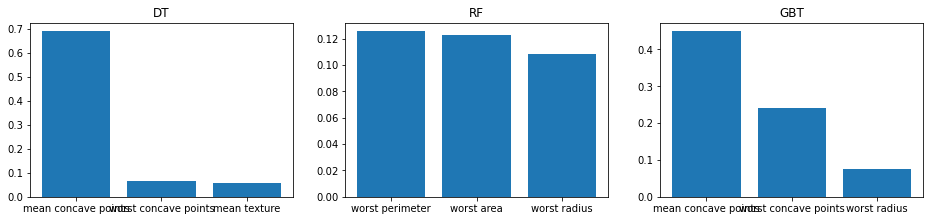

In [36]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=plt.figaspect(0.2))
ax = fig.add_subplot(1, 3, 1)
ax.bar(feature_importance_dt['Feature'][:3], feature_importance_dt['Importance (DT)'][:3])
plt.title('DT')

ax = fig.add_subplot(1, 3, 2)
ax.bar(feature_importance_rf['Feature'][:3], feature_importance_rf['Importance (RF)'][:3])
plt.title(f'RF')

ax = fig.add_subplot(1, 3, 3)
ax.bar(feature_importance_gbt['Feature'][:3], feature_importance_gbt['Importance (GBT)'][:3])
plt.title(f'GBT')

plt.show()

# SOTA boosting implementations

There are a few boosting implementations you ought to know of, even if we do not cover them directly in this course.

1. XGBoost. See https://xgboost.readthedocs.io/. $\texttt{conda install -c conda-forge xgboost}$.
1. LGBM. See https://lightgbm.readthedocs.io/. $\texttt{conda install -c conda-forge lightgbm}$.
1. CatBoost. See https://catboost.ai/. $\texttt{conda install -c conda-forge catboost}$.

If you want to learn the best of the best within boosting, check these out. I suggest starting with LGBM and then moving to CatBoost. XGBoost might be considered slightly outdated by now and I wouldn't spend the time learning it.

LGBM and CatBoost frequently win Kaggle competitions.



# Advantages and disadvantages of DTs (including ensembling and boosting)

Advantages

1. Generally speaking ***the best out-of-the-box algorithms***. RFs and gradient boosted trees tend to work on more or less anything, be it large or small datasets, classification or regression, and any type of data.
1. Gradient boosted decision trees achieves state-of-the-art results on a vast range of problems. Just check https://www.kaggle.com!
1. Works well even with non-numeric data, without scaling data, without fear of overfitting, with missing values, and more.

Disadvantages

1. Often (but not always!) surpassed by neural networks when enough data is available.
1. Not able to deal with unstructured data as well as neural networks.
1. Even though the successive stucture appears to mimic some of the behavior of *deep* learning, the greedy optimization is a weakness.

# Summary and looking ahead

In this/these lectures we:

1. Learned what a DT is and how they can be used for classification and regression.
1. Used DTs to solve classification and regression problems using Python.
1. Used ensembling to improve performance of DTs, specifically in the form of RFs.
1. Used boosting to improve performance of DTs, specifically in the form of gradient tree boosting.
1. Discussed some of the most powerful boosting algorithms.

Great! What's next?

We'll move on to neural networks, which will be the focus for the rest of the semester.

# "Bonus" exercises

These may be a bit boring, but I think they are a good exercise:

1. Revisit our first ensemble exercise (California housing prices) and implement boosting to improve your solution.
1. Revisit the first assignment and implement what you have learned to try and improve your solution.
1. Revisit the second assignment and implement what you have learned to try and improve your solution.